In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#import mpld3
#mpld3.enable_notebook()

In [23]:
# Data from the problem set For AHS 1 to 12
improve_rate = np.array([0, 0.00032, 0.001134, 0.00311, 0.006721, 0.010747, 0.014862, 0.024625, 0.033571, 0.040201, 0.030801, 0.032320, 0.00032, 0.001134, 0.00311, 0.006721, 0.010747, 0.014862, 0.024625, 0.033571, 0.040201, 0.030801, 0.03232])
deteriorate_rate = np.array([0.001013, 0.000961, 0.001473, 0.003199, 0.005537, 0.008135, 0.010858, 0.02387, 0.0313, 0.037877, 0.031978, 0])
death_rate = np.array([0.000123, 0.000172, 0.000245, 0.000319, 0.000417, 0.000564, 0.00076, 0.001029, 0.001372, 0.001862, 0.00245, 0.003553])
transplant_prob = np.array([0.0001, 0.0002, 0.0002, 0.0003, 0.0004, 0.0006, 0.0008, 0.0010, 0.0014, 0.0019, 0.0024, 0.0035])
post_trans_days_all=np.array([3747,3623.25,3502.5,3380,3259.25,3137.5,3014,2898.25,2776.5,2661.25,2537,2417.25])

In [24]:
#rate to Probabilities
prob_improv_rate=1-np.exp(-improve_rate)
prob_det_rate=1-np.exp(-deteriorate_rate)
prob_death_rate=1-np.exp(-death_rate)

In [25]:
#Probability Matrix 
def probability_matrix(threshold_policy,prob_improv_rate,prob_det_rate,prob_death_rate,transplant_prob):
    P=np.zeros((14,14)) #probability matrix initialization
    P[13][13]=1
    P[12][12]=1
    for i in range(0,12): 
            P[i][i+1]=prob_det_rate[i]
            P[i][12]=prob_death_rate[i]
            P[i][i-1]=prob_improv_rate[i]
            if i+1>=threshold_policy:
                P[i][13]=transplant_prob[i]
                
            if i!=11:
                P[i][i]=1-(P[i][i+1]+P[i][12]+P[i][i-1]+P[i][13])
            else:
                 P[i][i]=1-(P[i][12]+P[i][i-1]+P[i][13])
    return P

In [26]:
#likelihood and pre-transplant expected days calculation
def transient_analysis(P):
    Q=P[0:12,0:12]
    R=np.zeros((12,13))
    for i in range (0,12):
        R[i][0]=P[i][12]
        R[i][i+1]=P[i][13]
    I=np.identity(12)
    inv=np.linalg.inv(I-Q)
    ones = np.ones((12,1))
    pre_trans_days=np.dot(inv,ones) #partb
    likelihood=np.dot(inv,R) #partc
    return pre_trans_days, likelihood, R

In [113]:
def total_expectation(threshold_policy,prob_improv_rate,prob_det_rate,prob_death_rate,transplant_prob,post_trans_days_all):

    P=probability_matrix(threshold_policy,prob_improv_rate,prob_det_rate,prob_death_rate,transplant_prob)
    pre_trans_days, likelihood, R=transient_analysis(P)
    
    #set up post_trans_days array
    #post_trans_days_threshold_range=post_trans_days_all[threshold_policy-1:12]
    #zeros=np.zeros(threshold_policy-1)
    #post_trans_days_threshold=np.append(zeros,post_trans_days_threshold_range)
    #post_trans_days_threshold=np.array([post_trans_days_threshold])

    #total expectation 
    Total_expec_post=np.dot(np.array(likelihood[:,1:13]),post_trans_days_all).reshape((12,1))+pre_trans_days #PART D
    #print(pre_trans_days.shape)
    return Total_expec_post

def pre_expectation(threshold_policy,prob_improv_rate,prob_det_rate,prob_death_rate,transplant_prob):
    P=probability_matrix(threshold_policy,prob_improv_rate,prob_det_rate,prob_death_rate,transplant_prob)
    pre_trans_days, likelihood, R=transient_analysis(P)
    return pre_trans_days

def all_likelihood(threshold_policy,prob_improv_rate,prob_det_rate,prob_death_rate,transplant_prob):
    P=probability_matrix(threshold_policy,prob_improv_rate,prob_det_rate,prob_death_rate,transplant_prob)
    pre_trans_days, likelihood, R=transient_analysis(P)
    return likelihood

In [68]:
#given a threshold policy of 5 or up
P=probability_matrix(5,prob_improv_rate,prob_det_rate,prob_death_rate,transplant_prob)
pre_trans_days, likelihood, R=transient_analysis(P)
x_tot=total_expectation(5,prob_improv_rate,prob_det_rate,prob_death_rate,transplant_prob,post_trans_days_all)
x_pre=pre_expectation(5,prob_improv_rate,prob_det_rate,prob_death_rate,transplant_prob)
P_columns = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 'Death', 'Transplant']
df_P = pd.DataFrame(P,index=P_columns,columns=P_columns)

Text(0, 0.5, 'Likelihood of Death')

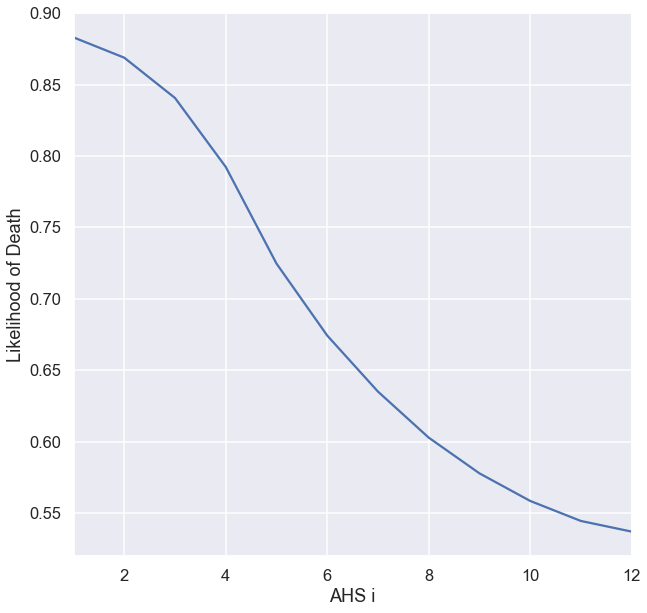

In [121]:
order = [12,0,1,2,3,4,5,6,7,8,9,10,11]
df_like = pd.DataFrame(likelihood,index=P_columns[:-2],columns=[P_columns[i] for i in order])
ax = df_like.iloc[:,0].plot(figsize=(10,10))
ax.set_xlabel('AHS i')
ax.set_ylabel('Likelihood of Death')

In [67]:
df_x_tot = pd.DataFrame(x_tot.round(2),columns=['Total (Post + Pre) Expected Lifespan'],index=P_columns[:-2])
df_x_tot

,Total (Post + Pre) Expected Lifespan
1,4745.29
2,4334.06
3,3932.02
4,3597.47
5,3318.37
6,3053.51
7,2786.92
8,2509.40
9,2273.74
10,2067.13


In [118]:
#given for all thresehold_policy Part e
x=[]
y=[total_expectation(i,prob_improv_rate,prob_det_rate,prob_death_rate,transplant_prob,post_trans_days_all) for i in range (1,14)]
x=np.stack(y,axis=0)
x=x.reshape((13,12))
x_sum=np.sum(x,axis=1)
#Pre
x_2=[]
y_2=[pre_expectation(i,prob_improv_rate,prob_det_rate,prob_death_rate,transplant_prob) for i in range (1,14)]
x_2=np.stack(y_2,axis=0)
x_2=x_2.reshape((13,12))
x_2_sum=np.sum(x_2,axis=1)
#Expectation
x_3=[]
y_3=[all_likelihood(i,prob_improv_rate,prob_det_rate,prob_death_rate,transplant_prob) for i in range (1,14)]
x_3=np.stack(y_3,axis=0)
x_3=x_3.reshape((169,12))

<Figure size 432x288 with 0 Axes>

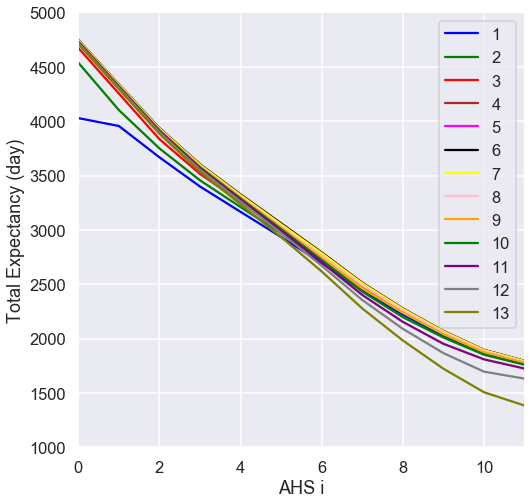

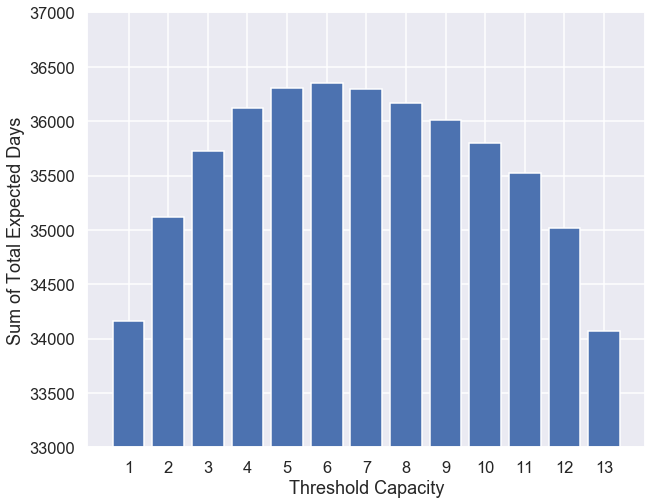

In [38]:
#plot Expectancy vs. AHS with different threshold capacity
plt.figure()
label_list=[]
color_list=['blue','green','red','brown','magenta','black','yellow','pink','orange','green','purple','grey','olive']

sns.set('talk')
plt.figure(figsize=(8,8))
for i in range(0,13):
    label_list.append(i+1)
    plt.plot(x[i,:],c=color_list[i])
    plt.legend(label_list)
    
plt.ylim(1000, 5000)
plt.xlim(0,11,1)
plt.ylabel('Total Expectancy (day)') 
plt.xlabel('AHS i')
plt.show()

plt.figure(figsize=(10,8))
label_list=list(map(str, label_list))
plt.bar(label_list,x_sum)
plt.ylim(33000, 37000)
plt.ylabel('Sum of Total Expected Days')
plt.xlabel('Threshold Capacity')
plt.show()

In [98]:
P_columns = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 'Death', 'Transplant']
df_P = pd.DataFrame(P,index=P_columns,columns=P_columns)
df_P

,1,2,3,4,5,6,7,8,9,10,11,12,Death,Transplant
1,0.998865,0.001012,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000123,0.0000
2,0.000320,0.998548,0.000961,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000172,0.0000
3,0.000000,0.001133,0.997150,0.001472,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000245,0.0000
4,0.000000,0.000000,0.003105,0.993382,0.003194,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000319,0.0000
5,0.000000,0.000000,0.000000,0.006698,0.986963,0.005522,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000417,0.0004
6,0.000000,0.000000,0.000000,0.000000,0.010689,0.980045,0.008102,0.000000,0.000000,0.000000,0.000000,0.000000,0.000564,0.0006
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.014752,0.972889,0.010799,0.000000,0.000000,0.000000,0.000000,0.000760,0.0008
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.024324,0.950060,0.023587,0.000000,0.000000,0.000000,0.001028,0.0010
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033014,0.933400,0.030815,0.000000,0.000000,0.001371,0.0014
10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.039404,0.919667,0.037169,0.000000,0.001860,0.0019


In [65]:
order = [12,0,1,2,3,4,5,6,7,8,9,10,11]
df_like = pd.DataFrame(likelihood,index=P_columns[:-2],columns=[P_columns[i] for i in order])
df_like

,Death,1,2,3,4,5,6,7,8,9,10,11,12
1,0.882999,0.0,0.0,0.0,0.0,0.046472,0.028222,0.016113,0.006782,0.005138,0.004073,0.004677,0.005525
2,0.868786,0.0,0.0,0.0,0.0,0.052117,0.031650,0.018070,0.007605,0.005762,0.004567,0.005245,0.006196
3,0.840558,0.0,0.0,0.0,0.0,0.063329,0.038459,0.021958,0.009241,0.007002,0.005550,0.006373,0.007529
4,0.792287,0.0,0.0,0.0,0.0,0.082502,0.050103,0.028605,0.012039,0.009121,0.007230,0.008302,0.009808
5,0.724615,0.0,0.0,0.0,0.0,0.109381,0.066427,0.037925,0.015962,0.012093,0.009586,0.011007,0.013004
6,0.674219,0.0,0.0,0.0,0.0,0.085730,0.096057,0.054842,0.023081,0.017488,0.013862,0.015917,0.018804
7,0.634987,0.0,0.0,0.0,0.0,0.066841,0.074892,0.085039,0.035791,0.027117,0.021494,0.024682,0.029159
8,0.602755,0.0,0.0,0.0,0.0,0.050691,0.056797,0.064492,0.058321,0.044187,0.035025,0.040219,0.047514
9,0.577750,0.0,0.0,0.0,0.0,0.038396,0.043020,0.048849,0.044175,0.065590,0.051991,0.059700,0.070529
10,0.558422,0.0,0.0,0.0,0.0,0.028676,0.032130,0.036483,0.032992,0.048986,0.074842,0.085940,0.101528


In [104]:
r_2=np.stack(R,axis=0)
df_r2 = pd.DataFrame(r_2,columns=[P_columns[i] for i in order],index =[i for i in range (1,13)])
df_r2

,Death,1,2,3,4,5,6,7,8,9,10,11,12
1,0.000123,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000
2,0.000172,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000
3,0.000245,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000
4,0.000319,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000
5,0.000417,0.0,0.0,0.0,0.0,0.0004,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000
6,0.000564,0.0,0.0,0.0,0.0,0.0000,0.0006,0.0000,0.000,0.0000,0.0000,0.0000,0.0000
7,0.000760,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0008,0.000,0.0000,0.0000,0.0000,0.0000
8,0.001028,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.001,0.0000,0.0000,0.0000,0.0000
9,0.001371,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.000,0.0014,0.0000,0.0000,0.0000
10,0.001860,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.000,0.0000,0.0019,0.0000,0.0000


In [41]:
df_tot_expected = pd.DataFrame(x,index=P_columns[:-1])
df_tot_expected

,0,1,2,3,4,5,6,7,8,9,10,11
1,4027.865886,3955.045416,3666.946126,3398.358426,3165.225937,2933.482902,2693.344720,2438.428874,2219.980892,2026.985782,1864.507948,1769.829796
2,4537.792817,4101.356824,3748.801315,3455.328480,3209.042437,2967.825083,2720.120067,2458.734805,2235.361564,2038.472909,1873.029529,1776.805714
3,4673.175699,4253.185417,3833.743142,3514.446790,3254.511192,3003.462256,2747.905071,2479.806443,2251.322219,2050.393197,1881.872446,1784.044683
4,4727.608522,4314.230498,3907.920894,3566.073456,3294.218015,3034.583384,2772.169080,2498.207821,2265.260293,2060.802913,1889.594763,1790.366309
5,4745.293390,4334.063645,3932.020760,3597.469570,3318.365225,3053.509310,2786.924934,2509.398390,2273.736559,2067.133451,1894.290993,1794.210727
6,4748.377993,4337.522952,3936.224270,3602.945695,3325.625473,3059.199695,2791.361520,2512.763015,2276.285085,2069.036830,1895.702991,1795.366614
7,4745.613575,4334.422725,3932.457089,3598.037998,3319.118847,3050.262102,2784.393205,2507.478373,2272.282247,2066.047292,1893.485240,1793.551123
8,4740.510343,4328.699575,3925.502713,3588.978181,3307.107340,3033.762927,2760.824956,2489.604646,2258.743841,2055.936071,1885.984357,1787.410767
9,4736.426623,4324.119783,3919.937667,3581.728314,3297.495465,3020.559922,2741.965121,2461.690659,2237.600467,2040.145044,1874.269981,1777.821170
10,4732.033061,4319.192510,3913.950387,3573.928382,3287.154312,3006.355170,2721.674341,2431.658766,2196.213662,2009.235116,1851.339838,1759.050147


In [124]:
df_expected = pd.DataFrame(x_2,index=P_columns[:-1])
df_expected

,0,1,2,3,4,5,6,7,8,9,10,11
1,2459.375993,2256.272013,2021.317260,1772.075972,1560.073767,1352.593315,1149.723676,946.050796,774.977873,628.938100,510.840524,443.923186
2,3041.497192,2423.297850,2114.761316,1837.111714,1610.093706,1391.797582,1180.289814,969.231593,792.536105,642.051547,520.568571,451.886738
3,3727.689125,3192.845332,2545.291347,2136.754525,1840.553367,1572.425595,1321.118891,1076.033778,873.433130,702.469865,565.389144,488.577657
4,4145.954068,3661.919243,3115.277459,2533.456795,2145.662876,1811.562128,1507.564927,1217.431027,980.534092,782.458716,624.727871,537.153396
5,4386.739884,3931.954651,3443.405775,2960.926136,2474.435788,2069.245391,1708.471174,1369.794635,1095.941492,868.651268,688.668737,589.496528
6,4515.854727,4076.753792,3619.355657,3190.144939,2778.334133,2307.432646,1894.177093,1510.630593,1202.617306,948.322594,747.771913,637.879440
7,4597.319392,4168.114423,3730.370765,3334.769930,2970.077980,2570.814679,2099.526463,1666.363783,1320.576987,1036.421329,813.126857,691.380161
8,4643.983393,4220.446959,3793.961636,3417.612972,3079.911304,2721.683272,2315.034726,1829.801291,1444.372284,1128.878421,881.714992,747.527631
9,4662.269165,4240.954006,3818.880378,3450.075876,3122.950631,2780.802694,2399.483873,1954.792434,1539.046485,1199.586288,934.168738,790.467201
10,4674.816766,4255.025833,3835.979488,3472.351751,3152.483991,2821.370131,2457.432435,2040.560702,1657.243318,1287.862140,999.655074,844.075482
